# Autoregressive Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller

In [2]:
plt.rcParams["figure.figsize"] = [10, 7.5]

## Simulate AR(2) Process

$y_t = 0.33 y_{t-1} + 0.5 y_{t-2}$

In [3]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [4]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

(0.0, 200.0)

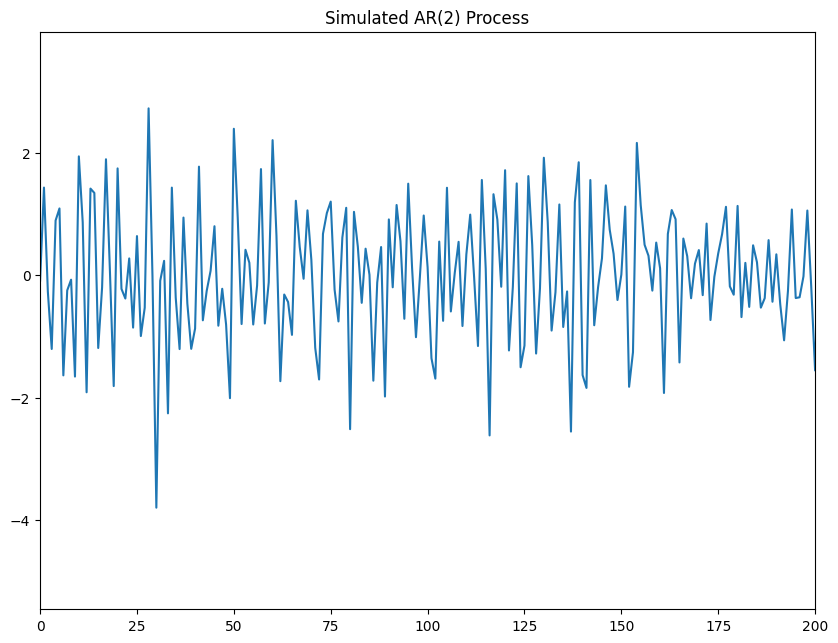

In [5]:
plt.plot(AR2_process)
plt.title("Simulated AR(2) Process")
plt.xlim(0, 200)

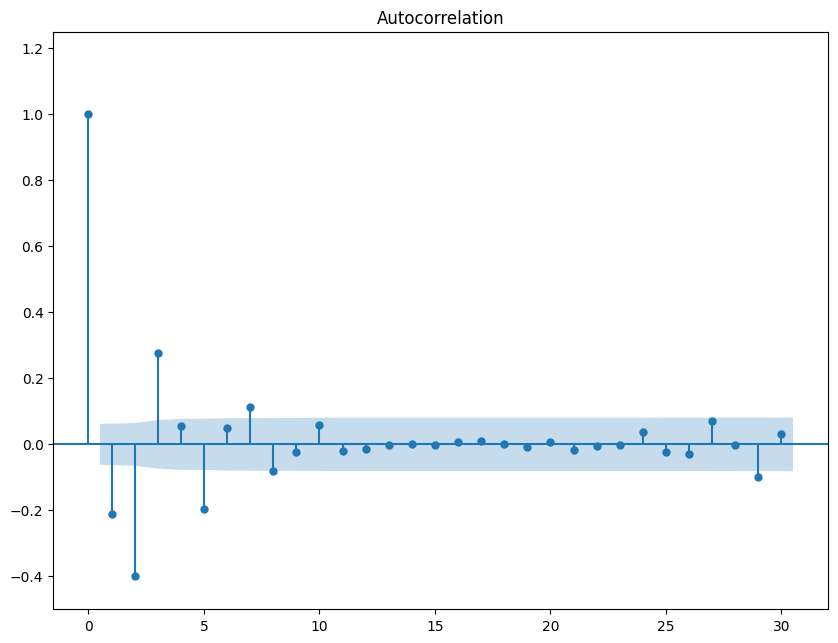

In [6]:
plot_acf(AR2_process, auto_ylims=True);  # fmt: skip

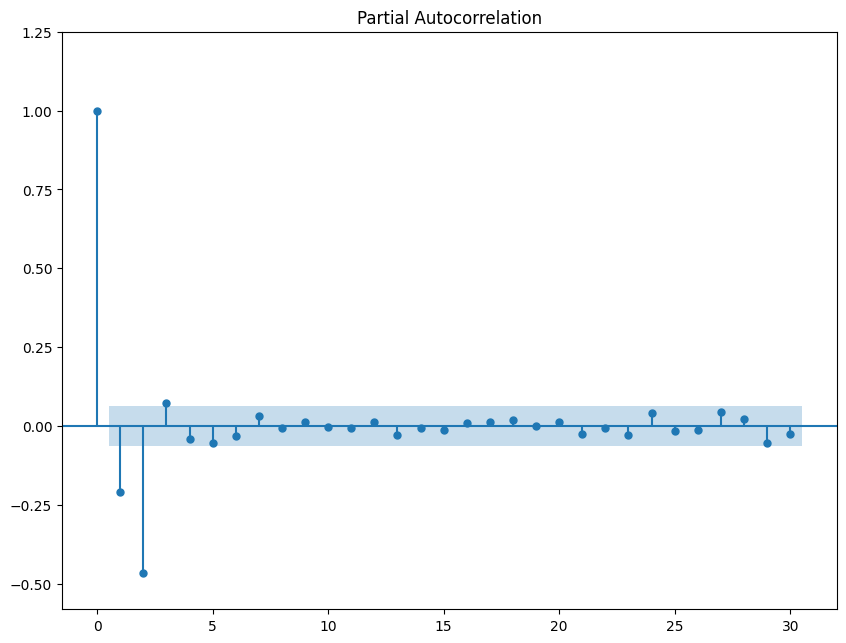

In [7]:
plot_pacf(AR2_process, auto_ylims=True);  # fmt: skip

In [8]:
rho, sigma = yule_walker(AR2_process, 2, method="mle")
print(f"rho: {-rho}")
print(f"sigma: {sigma}")

rho: [0.30863731 0.4647677 ]
sigma: 1.019173557958866


## Simulate AR(3) Process

$y_t = 0.33 y_{t-1} + 0.5 y_{t-2} + 0.07 y_{t-3}$

In [9]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [10]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

(0.0, 200.0)

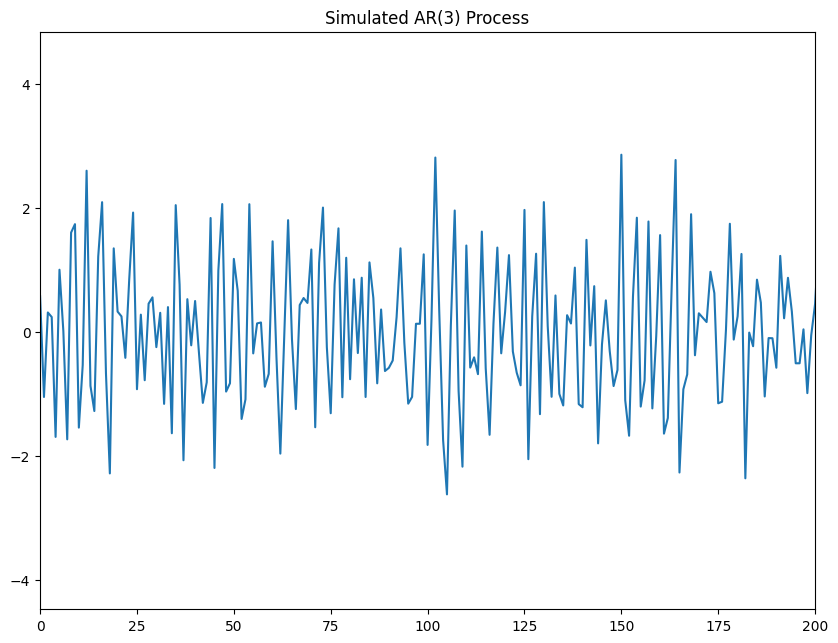

In [11]:
plt.plot(AR3_process)
plt.title("Simulated AR(3) Process")
plt.xlim(0, 200)

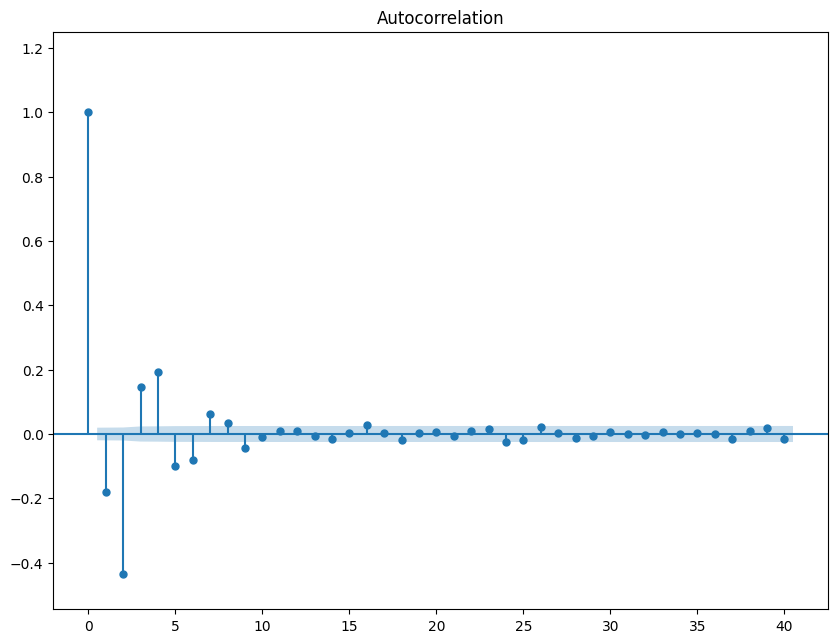

In [12]:
plot_acf(AR3_process, auto_ylims=True);  # fmt: skip

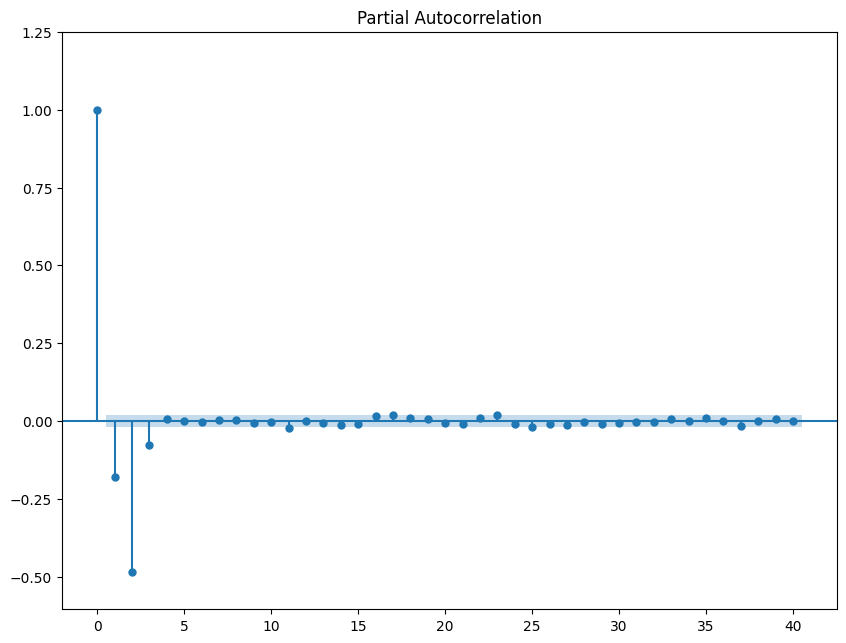

In [13]:
plot_pacf(AR3_process, auto_ylims=True);  # fmt: skip

In [14]:
rho, sigma = yule_walker(AR3_process, 3, method="mle")
print(f"rho: {-rho}")
print(f"sigma: {sigma}")

rho: [0.30229912 0.50352487 0.07611204]
sigma: 0.9937007902401936


# Mini Project: Model Johnson&Johnson Quarterly Earnings per Share (EPS)

In [15]:
data = pd.read_csv("jj.csv")
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 [Text(0, 0, '1960-01-01'),
  Text(1, 0, '1960-04-01'),
  Text(2, 0, '1960-07-02'),
  Text(3, 0, '1960-10-01'),
  Text(4, 0, '1961-01-01'),
  Text(5, 0, '1961-04-02'),
  Text(6, 0, '1961-07-02'),
  Text(7, 0, '1961-10-01'),
  Text(8, 0, '1962-01-01'),
  Text(9, 0, '1962-04-02'),
  Text(10, 0, '1962-07-02'),
  Text(11, 0, '1962-10-01'),
  Text(12, 0, '1963-01-01'),
  Text(13, 0, '1963-04-02'),
  Text(14, 0, '1963-07-02'),
  Text(15, 0, '1963-10-01'),
  Text(16, 0, '1964-01-01'),
  Text(17, 0, '1964-04

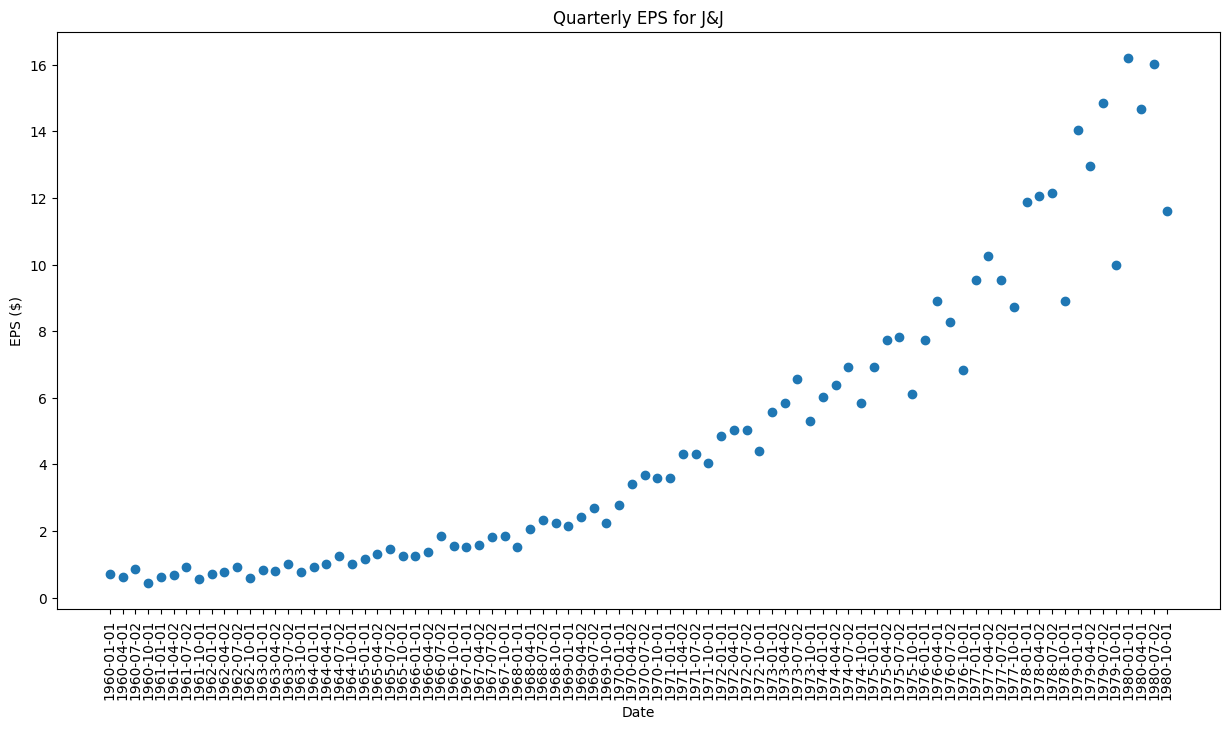

In [16]:
plt.figure(figsize=(15, 7.5))
plt.scatter(data["date"], data["data"])
plt.title("Quarterly EPS for J&J")
plt.xlabel("Date")
plt.ylabel("EPS ($)")
plt.xticks(rotation=90)

In [17]:
# Take the log difference
data["data"] = np.log(data["data"])
data["data"] = data["data"].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


Text(0.5, 1.0, 'Log Difference of Quarterly EPS for J&J')

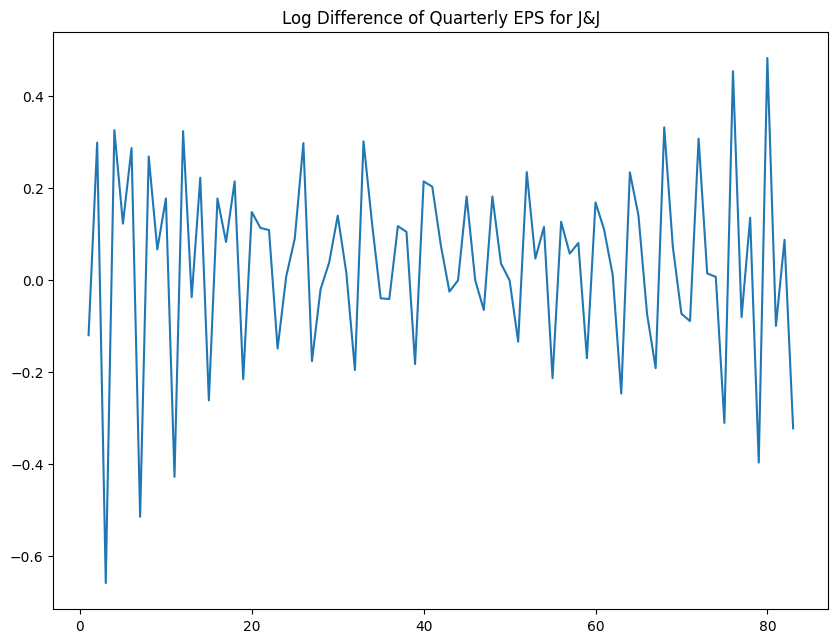

In [18]:
plt.plot(data["data"])
plt.title("Log Difference of Quarterly EPS for J&J")

In [19]:
ad_fuller_result = adfuller(data["data"])
print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -4.317043945811837
p-value: 0.00041497314044406584


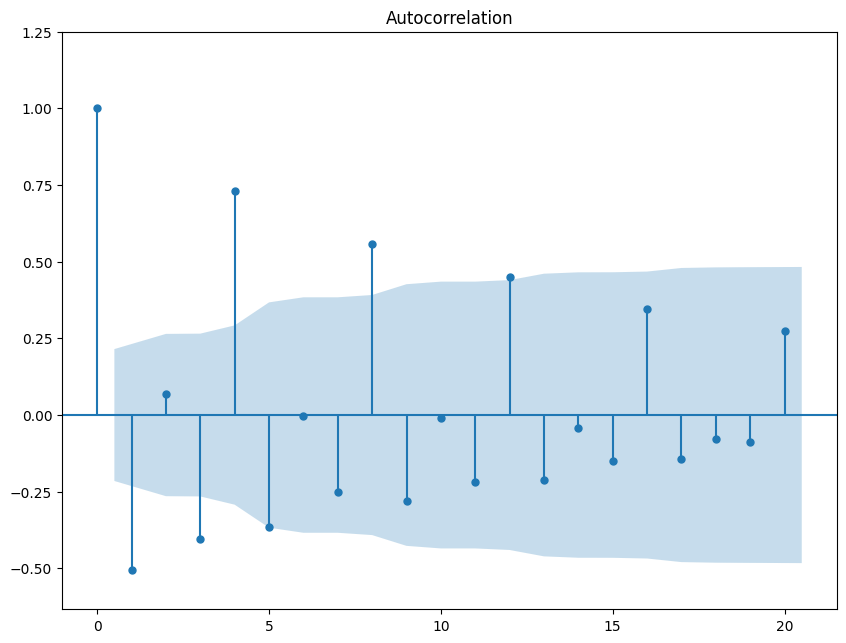

In [20]:
plot_acf(data["data"], auto_ylims=True);  # fmt: skip

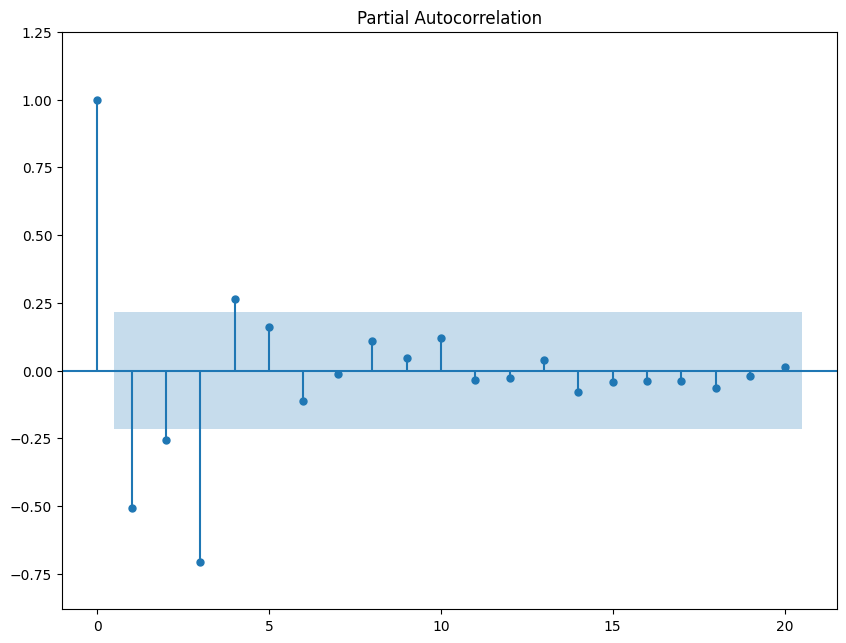

In [21]:
plot_pacf(data["data"], auto_ylims=True);  # fmt: skip

In [22]:
# Try AR(4)
rho, sigma = yule_walker(data["data"], 4, method="mle")
print(f"rho: {-rho}")
print(f"sigma: {sigma}")

rho: [ 0.62934923  0.51715263  0.48833738 -0.26512667]
sigma: 0.1191319559071562
